In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import shuffle

In [2]:
DATA = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'

In [3]:
df = pd.read_csv(DATA)
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [5]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['BMW' 'Audi' 'FIAT' 'Mercedes-Benz' 'Chrysler']
48

model
['1 Series M' '1 Series' '100' '124 Spider' '190-Class']
915

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium unleaded (required)' 'regular unleaded'
 'premium unleaded (recommended)' 'flex-fuel (unleaded/E85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['MANUAL' 'AUTOMATIC' 'AUTOMATED_MANUAL' 'DIRECT_DRIVE' 'UNKNOWN']
5

driven_wheels
['rear wheel drive' 'front wheel drive' 'all wheel drive'
 'four wheel drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['Factory Tuner,Luxury,High-Performance' 'Luxury,Performance'
 'Luxury,High-Performance' 'Luxury' 'Performance']
71

vehicle_size
['Compact' 'Midsize' 'Large']
3

vehicle_style
['Coupe' 'Convertible' 'Sedan' 'Wagon' '4dr Hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

## *Long tail Distribution*: 
A probability distribution is said to have a long tail if a larger share of population rests within its tail than would under a normal distribution. A long-tail distribution will arise with the inclusion of many values unusually far from the mean, which increase the magnitude of the skewness of the distribution. 

<Axes: xlabel='msrp', ylabel='Count'>

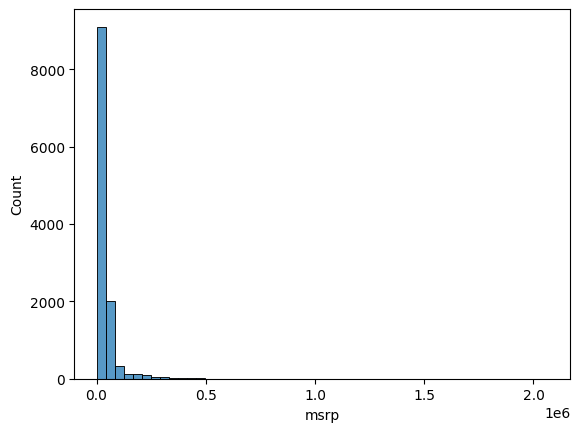

In [6]:
sns.histplot(df.msrp, bins=50)

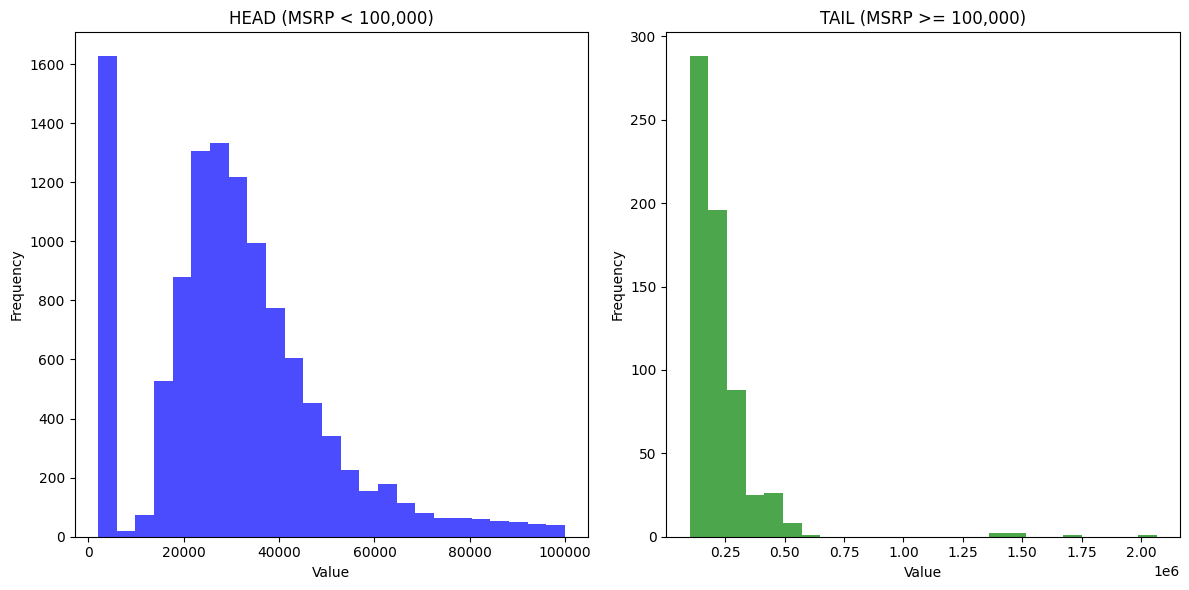

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.hist(df.msrp[df.msrp <= 100000], bins=25, color='blue', alpha=0.7)
ax1.set_title('HEAD (MSRP < 100,000)')
ax1.set_xlabel('Value')
ax1.set_ylabel('Frequency')

ax2.hist(df.msrp[df.msrp > 100000], bins=25, color='green', alpha=0.7)
ax2.set_title('TAIL (MSRP >= 100,000)')
ax2.set_xlabel('Value')
ax2.set_ylabel('Frequency')

plt.tight_layout()

plt.show()

### Annotations:
* This kind of distribution, isn't good for a Regression Model, it'll 'confuse' our model with the data from tail.
* For this we apply the logarithmic distribution to data.


<Axes: xlabel='msrp', ylabel='Count'>

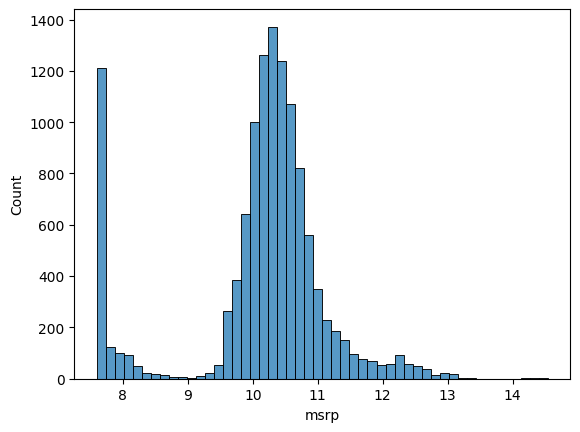

In [8]:
price_logs = np.log1p(df.msrp)
sns.histplot(price_logs, bins=50)

In [9]:
leng = len(df)
df = shuffle(df, random_state=42)

idx = np.arange(leng)
np.random.shuffle(idx)

leng_val = int(leng * 0.15)
leng_test = int(leng * 0.15)
leng_train = leng - leng_val - leng_test

df_split = np.split(df.iloc[idx], [leng_train, leng_train + leng_val])
df_train, df_val, df_test = [df.reset_index(drop=True) for df in df_split]

In [10]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

assert len(y_train) == len(df_train)
assert len(y_val) == len(df_test)